# Part 1 Feature engineering

## 1.1 Import the data and create the anchor date columns.

### 1.1.1 Import the dataset as txn1 and identify the number of rows.

In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt

In [2]:
txn = pd.read_csv('Retail_Data_Transactions.csv')
print('Number of rows is', txn.shape[0], '.')

Number of rows is 125000 .


### 1.1.2 Create a new column 'txn date' from 'trans date' to standarize it.

In [3]:
txn['txn_date'] = pd.to_datetime(txn['trans_date'])
txn.drop('trans_date', axis = 1, inplace = True)

### 1.1.3 Identify the min() and max() of column 'txn date'.

In [4]:
min(txn['txn_date'])

Timestamp('2011-05-16 00:00:00')

In [5]:
max(txn['txn_date'])

Timestamp('2015-03-16 00:00:00')

#### The minimum of "txn_date" is 2011-05-16.
#### The maximum of "txn_date" is 2015-03-16.

### 1.1.4 Create the column 'ME DT': the last day of the month in the 'trans date' column.

In [6]:
txn['ME_DT'] = pd.to_datetime(txn['txn_date'], format="%Y%m") + MonthEnd(0)

### 1.1.5 Create the column 'YEAR': the year in the 'trans date' column.

In [7]:
txn['YEAR'] = txn['txn_date'].dt.year

# check table output
txn.iloc[55:60, :]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


## 1.2 Create features that capture annual spending.

## Here the approach is to capture the client's annual spending. The rationale behind this approach is that the clients spend is not very frequent to capture in a monthly aggregation.

### 1.2.1 Using groupby and NamedAgg create clnt annual aggregations, the annual aggregations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation functions.

In [8]:
clnt_annual_aggregations = txn.groupby(by = ['customer_id', 'YEAR']).agg(
    ann_txn_amt_sum = pd.NamedAgg('tran_amount', 'sum'),
    ann_txn_amt_ave = pd.NamedAgg('tran_amount', 'mean'),
    ann_txn_amt_std = pd.NamedAgg('tran_amount', 'std'),
    ann_txn_amt_var = pd.NamedAgg('tran_amount', 'var'),
    ann_txn_amt_sem = pd.NamedAgg('tran_amount', 'sem'),
    ann_txn_amt_max = pd.NamedAgg('tran_amount', 'max'),
    ann_txn_amt_min = pd.NamedAgg('tran_amount', 'min'),
    ann_txn_cnt = pd.NamedAgg('tran_amount', 'count'),
)
clnt_annual_aggregations

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id YEAR                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1  
...                           ...          ...  
CS9000      2011               16            2  
            2012               37            4  
            2013               71            2  
            2014               16            4  
            2015               34            1  

[31140 rows x 8 columns]

### 1.2.2 Plot the histogram of the sum and count.

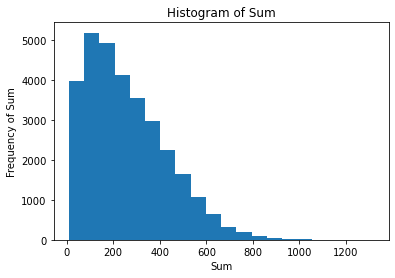

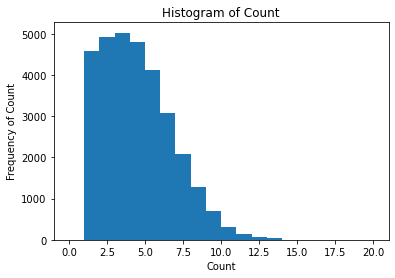

In [9]:
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'], bins = 20)
plt.ylabel('Frequency of Sum')
plt.xlabel('Sum')
plt.title('Histogram of Sum')
plt.show()

plt.hist(clnt_annual_aggregations['ann_txn_cnt'], bins = 20, range = (0, 20), rwidth = 1)
plt.ylabel('Frequency of Count')
plt.xlabel('Count')
plt.title('Histogram of Count')
plt.show()

### 1.2.3 Reset the index and reshape the table with the pivot table function to create the clnt annual aggregations pivot table shown below with 40 columns.

In [10]:
clnt_annual_aggregations_pivot = pd.pivot_table(clnt_annual_aggregations,
                                                index = 'customer_id',
                                                columns = 'YEAR',
                                                fill_value = 0)
clnt_annual_aggregations_pivot

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000   0.000000   
CS8997            45.000000  39.500000  35.166667  42.000000   0.000000   
CS8998            64.000000  54.400000  47.000000  32.500000   0.000000   
CS8999            52.000000  25.250000  28.000000  21.000000   0.000000   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_max                      ... ann_txn_amt_var  \
YEAR                   2011 2012 2013 2014 2015  ...            2011   
customer_id                                      ...                   
CS1112                   96   81  105   90   39  ...      485.333333   
CS1113                   94   95   97   97   98  ...      444.333333   
CS1114                   97   97  105   95   79  ...       94.700000   
CS1115                  102  104   94   98   55  ...      225.000000   
CS1116                   87  105   59   96    0  ...      449.583333   
...                     ...  ...  ...  ...  ...  ...             ...   
CS8996                   38   38   50   79    0  ...       98.000000   
CS8997                   47   49   75   45    0  ...        8.000000   
CS8998                   69   79   75   49    0  ...       50.000000   
CS8999                   64   30   39   24    0  ...      333.000000   
CS9000                   23   77   76   35   34  ...       24.500000   

                                                             ann_txn_cnt       \
YEAR               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333    0.000000           3    5   
CS1113       290.200000   171.200000  781.666667  745.333333           3    5   
CS1114       968.000000   619.300000  726.166667    0.000000           5    2   
CS1115       477.285714   110.952381  512.250000    0.000000           3    7   
CS1116       908.333333     0.000000  636.800000    0.000000           4    3   
...                 ...          ...         ...         ...         ...  ...   
CS8996        20.333333   144.500000  481.600000    0.000000           2    3   
CS8997        45.666667   441.366667   18.000000    0.000000           2    4   
CS8998       505.300000  1568.000000  219.666667    0.000000           2    5   
CS8999        21.583333   103.000000   18.000000    0.000000           3    4   
CS9000       281.333333    12.500000   68.250000    0.000000           2    4   

                            
YEAR        2013 2014 2015  
customer_id                 
CS1112         3    3    1  
CS1113         5    4    3  
CS1114         5    6    1  
CS1115         7    4    1  
CS1116         1    5    0  
...          ...  ...  ...  
CS8996         2    6    0  
CS8997         6    2    0  
CS8998         2    4    0  
CS8999         3    2    0  
CS9000         2    4    1  

[6889 rows x 40 columns]

#### I filled NaN values with 0. Since we are aggregating annual spending, and there are some cases where one didn't spend on the particular year. It is sensible because for example, the last day of this dataset is 2015-03-16, so it could be that people haven't spend any money at this time of the year. Also, it is not appropriate if we fill the value based on other values, since then we are saying one has spent money in that year, which is not the case.

### 1.2.4 Confrm the number of levels of the columns is 2.

In [11]:
clnt_annual_aggregations_pivot.columns.nlevels

2

In [12]:
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_amt

#### The number of column levels is 2. The first level name is 'None' because it's the columns we aggregated, the columns names are what we defined previously; while the second level name is 'YEAR', which is contained in the previous dataframe. The column names is a list of tuples with length 40, each containing 2 components, a statistic and the year. There are 8 statistics, and it's 5 year's data, so there are 40 columns.

### 1.2.5 Save the dataframe clnt annual aggregations pivot as an '.xlsx' file.

In [13]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_annual_aggregations_pivot

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,96,81,105,90,39,...,485.333333,161.800000,1190.333333,284.333333,0.000000,3,5,3,3,1
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,94,95,97,97,98,...,444.333333,290.200000,171.200000,781.666667,745.333333,3,5,5,4,3
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,97,97,105,95,79,...,94.700000,968.000000,619.300000,726.166667,0.000000,5,2,5,6,1
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,102,104,94,98,55,...,225.000000,477.285714,110.952381,512.250000,0.000000,3,7,7,4,1
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,87,105,59,96,0,...,449.583333,908.333333,0.000000,636.800000,0.000000,4,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,38,38,50,79,0,...,98.000000,20.333333,144.500000,481.600000,0.000000,2,3,2,6,0
CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,47,49,75,45,0,...,8.000000,45.666667,441.366667,18.000000,0.000000,2,4,6,2,0
CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,69,79,75,49,0,...,50.000000,505.300000,1568.000000,219.666667,0.000000,2,5,2,4,0


#### The first line of code stores column names of level 0, the second line of code stores column names of level 1, the third line of code combine them together with "_" and set them as columns, so columns of this pivot dataframe has only one level (with no level name).

In [14]:
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")  

### 1.2.6 What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section (if any)?

#### The annual feature may not be optimal to capture consumer's behaviours since one year is too long, so variations among people will be large. Some people shop many times per year, while others may not shop once in a year. And variations of these 5 years are large, as presented in the table. So, it may not be optimal to use this feature.

## 1.3 Create monthly aggregations.
## Here, you want to explore the monthly sum of amounts and count of clients transactions.

### 1.3.1. Create the dataframe that captures the monthly sum and count of transactions per client (name it clnt monthly aggregations).

In [15]:
clnt_monthly_aggregations = txn.groupby(by = ['customer_id', 'ME_DT']).agg(
    mth_txn_amt_sum = pd.NamedAgg('tran_amount', 'sum'),
    mth_txn_cnt = pd.NamedAgg('tran_amount', 'count'),
)
clnt_monthly_aggregations.loc['CS1112']

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


### 1.3.2 Create a histogram of both columns.

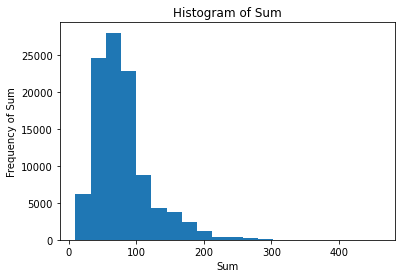

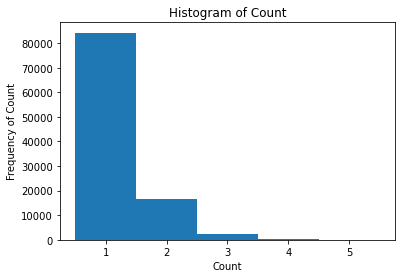

In [16]:
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'], bins = 20)
plt.ylabel('Frequency of Sum')
plt.xlabel('Sum')
plt.title('Histogram of Sum')
plt.show()

plt.hist(clnt_monthly_aggregations['mth_txn_cnt'], align = 'left', bins = 5)
plt.ylabel('Frequency of Count')
plt.xlabel('Count')
plt.title('Histogram of Count')
plt.show()

In [17]:
import scipy as sci
from scipy import stats
print(stats.mode(clnt_monthly_aggregations['mth_txn_amt_sum'].values))
print(stats.mode(clnt_monthly_aggregations['mth_txn_cnt'].values))

ModeResult(mode=array([77]), count=array([1293]))
ModeResult(mode=array([1]), count=array([84247]))


In [18]:
max(clnt_monthly_aggregations['mth_txn_amt_sum'].values)

460

In [19]:
max(clnt_monthly_aggregations['mth_txn_cnt'].values)

6

#### The most common value in column "mth_txn_amt_sum" is 77, while the maximum value in column "mth_txn_amt_sum" is 460.
#### The most common value in column "mth_txn_cnt" is 1, while the maximum value in column "mth_txn_cnt" is 6.

In [20]:
clnt_monthly_aggregations['mth_txn_amt_sum'].describe()

count    103234.000000
mean         78.694897
std          41.529152
min          10.000000
25%          50.000000
50%          72.000000
75%          95.000000
max         460.000000
Name: mth_txn_amt_sum, dtype: float64

In [21]:
clnt_monthly_aggregations['mth_txn_cnt'].describe()

count    103234.000000
mean          1.210841
std           0.475437
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: mth_txn_cnt, dtype: float64

In [22]:
clnt_annual_aggregations['ann_txn_amt_sum'].describe()

count    31140.000000
mean       260.885967
std        171.892220
min         10.000000
25%        123.000000
50%        228.000000
75%        368.000000
max       1317.000000
Name: ann_txn_amt_sum, dtype: float64

In [23]:
clnt_annual_aggregations['ann_txn_cnt'].describe()

count    31140.000000
mean         4.014130
std          2.311327
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         18.000000
Name: ann_txn_cnt, dtype: float64

#### It is clear from the histograms that most clients shop 1 time per month, and people barely shop more than 2 times per month. By the histogram, the average amount of money people spend in a month seems to fall between 50 to 100, and as confirmed above, the summary statistics, it is $78.69.

#### Compared to the annual spending, most people shop about 4 times, and spend about $260 per year, which seems reasonable if we combine information about shopping times and amount monthly and annually.

## 1.4 Create the base table for the rolling window features.

### 1.4.1 Create the numpy array of the unique elements in columns 'customer id' and 'ME DT' of the txn table you created in section 1.1. Confirm there are 6,889 unique clients and 47 unique month-end-dates.

In [24]:
clnt_no = txn['customer_id'].unique()
me_dt = txn['ME_DT'].unique()

unique = np.array([txn['customer_id'].nunique(), txn['ME_DT'].nunique()])
unique

array([6889,   47])

### 1.4.2 Use itertools.product to generate all the possible combinations of 'customer_id' and 'ME_DT'.

In [25]:
from itertools import product
base_table = product(clnt_no, me_dt)
base_table

### 1.4.3 convert the itertools.product object base table into a pandas object called base table_pd.

In [26]:
base_table_pd = pd.DataFrame.from_records(data = base_table, columns = ['CLNT_NO', 'ME_DT'])

In [27]:
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2011-08-31
323779,CS8077,2012-09-30
323780,CS8077,2014-09-30
323781,CS8077,2014-02-28


### 1.4.4 Confirm that the base table pd has 323,783 rows, which is the expected value of combinations for 6,889 unique clients and 47 unique month-end dates.

In [28]:
base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112'].sort_values('ME_DT')

,CLNT_NO,ME_DT
157064,CS1112,2011-05-31
157058,CS1112,2011-06-30
157044,CS1112,2011-07-31
157069,CS1112,2011-08-31
157060,CS1112,2011-09-30
157048,CS1112,2011-10-31
157029,CS1112,2011-11-30
157049,CS1112,2011-12-31
157046,CS1112,2012-01-31
157032,CS1112,2012-02-29


In [29]:
base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112'].sort_values('ME_DT').shape[0]

47

#### All dates fall into between the min and max of month-dates, however the table only shows the date of the end of each month. 
#### Also, the snapshot of client CS1112 has 47 rows, as confirmed above.

In [30]:
print('base_table_pd has', base_table_pd.shape[0], 'rows')

base_table_pd has 323783 rows


## 1.5 Create the monthly rolling window features.

### 1.5.1 Left-join the base table pd with the clnt monthly aggregations table from section 1.3 on [CLNT_NO, ME_DT] to create the table base clnt mth.

In [31]:
clnt_monthly_aggregations.index.names = ['CLNT_NO', 'ME_DT']
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_cnt
CLNT_NO ME_DT                                   
CS1112  2011-06-30               56            1
        2011-08-31               96            1
        2011-10-31               60            1
        2012-04-30               56            1
        2012-06-30               52            1
...                             ...          ...
CS9000  2014-01-31               16            1
        2014-05-31               20            1
        2014-07-31               26            1
        2014-08-31               35            1
        2015-02-28               34            1

[103234 rows x 2 columns]

In [32]:
base_clnt_mth = base_table_pd.merge(clnt_monthly_aggregations, how = 'left', on = ['CLNT_NO', 'ME_DT'])
base_clnt_mth.fillna(0, inplace = True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,0.0,0.0
323780,CS8077,2014-09-30,0.0,0.0
323781,CS8077,2014-02-28,0.0,0.0


In [33]:
323783 == 6889 * 47

True

#### 1. Some rows have NaN values because the corresponding client did not make any purchases in that month.

#### 2. I will again fill the NaN values with 0. Logically, as discussed in 1., NaN appears because there is no transaction associated with that client in that month, so this person shopped 0 times, spent 0 dollar, and we fill with 0.

#### 3. Number of rows is 323783, which equals 6889 (clients) * 47 (months), exactly like what I expect.

#### 4. clnt_monthly_aggregations displays the purchases history per client, so it only shows months in which transactions happened, as well as the amount of purchases; while base_clnt_mth shows purchase history per client within the 47-month period of this data, no matter the client makes the transactions or not. Therefore, number of rows for clnt_monthly_aggregations must be less than number of rows of base_clnt_mth, because not all clients make purchases for the full 47 months. Indeed, number of rows for clnt_monthly_aggregations and base_clnt_mth are 323783 and 103234.

### 1.5.2 Sort the data first by 'CLNT NO' and then by 'ME DT' in ascending order.

In [34]:
base_clnt_mth.sort_values(['CLNT_NO', 'ME_DT'], inplace = True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,34.0,1.0


### 1.5.3

In [35]:
rolling_features_3M = base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum', 'mth_txn_cnt']].rolling(3).agg({
    'mth_txn_amt_sum': ['sum', 'mean', 'max'],
    'mth_txn_cnt': ['sum', 'mean', 'max']
    })

In [36]:
rolling_features_6M = base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum', 'mth_txn_cnt']].rolling(6).agg({
    'mth_txn_amt_sum': ['sum', 'mean', 'max'],
    'mth_txn_cnt': ['sum', 'mean', 'max']
    })

In [37]:
rolling_features_12M = base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum', 'mth_txn_cnt']].rolling(12).agg({
    'mth_txn_amt_sum': ['sum', 'mean', 'max'],
    'mth_txn_cnt': ['sum', 'mean', 'max']
    })

In [45]:
## check snapshot
rolling_features_12M.head(20)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048             NaN        NaN   NaN         NaN       NaN  NaN
        157029             NaN        NaN   NaN         NaN       NaN  NaN
        157049             NaN        NaN   NaN         NaN       NaN  NaN
        157046             NaN        NaN   NaN         NaN       NaN  NaN
        157032             NaN        NaN   NaN         NaN       NaN  NaN
        157045             NaN        NaN   NaN         NaN       NaN  NaN
        157062           268.0  22.333333  96.0         4.0  0.333333  1.0
        157061           268.0  22.333333  96.0         4.0  0.333333  1.0
        157073           264.0  22.000000  96.0         4.0  0.333333  1.0
        157065           345.0  28.750000  96.0         5.0  0.416667  1.0
        157063           249.0  20.750000  81.0         4.0  0.333333  1.0
        157070           321.0  26.750000  81.0         5.0  0.416667  1.0
        157067           261.0  21.750000  81.0         4.0  0.333333  1.0
        157038           261.0  21.750000  81.0         4.0  0.333333  1.0
        157052           337.0  28.083333  81.0         5.0  0.416667  1.0

#### 2, 5, 11 rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively. They appear because there wasn't enough observations before them to get the 'rolling' value. For example, for rolling_features_3M, a rolling sum of the previous 2 observations plus itself are required for an observation, so the first two observations do not satisfy this condition, while the third observation does because it has 3 obervations to "roll with".

In [38]:
print('rolling_features_3M has', rolling_features_3M.columns.nlevels, 'level(s) of columns and',
      rolling_features_3M.index.nlevels, 'level(s) of index.')
print('rolling_features_6M has', rolling_features_6M.columns.nlevels, 'level(s) of columns and',
      rolling_features_6M.index.nlevels, 'level(s) of index.')
print('rolling_features_12M has', rolling_features_12M.columns.nlevels, 'level(s) of columns and',
      rolling_features_12M.index.nlevels, 'level(s) of index.')

rolling_features_3M has 2 level(s) of columns and 2 level(s) of index.
rolling_features_6M has 2 level(s) of columns and 2 level(s) of index.
rolling_features_12M has 2 level(s) of columns and 2 level(s) of index.


#### Since they have 2 levels of index, they are MultiIndex dataframes.

In [39]:
rolling_features_3M.columns = ['amt_sum_3M','amt_mean_3M','amt_max_3M',
                               'txn_cnt_sum_3M','txn_cnt_mean_3M','txn_cnt_max_3M']
rolling_features_6M.columns = ['amt_sum_6M','amt_mean_6M','amt_max_6M',
                               'txn_cnt_sum_6M','txn_cnt_mean_6M','txn_cnt_max_6M']
rolling_features_12M.columns = ['amt_sum_12M','amt_mean_12M','amt_max_12M',
                               'txn_cnt_sum_12M','txn_cnt_mean_12M','txn_cnt_max_12M']

### 1.5.4 Merge the 4 tables: base_clnt_mth, rolling_features_3M, rolling_features_6M, rolling_features_12M in the output all rolling features.

In [46]:
df3M6M = pd.merge(rolling_features_3M, rolling_features_6M, left_index = True, right_index = True)
df3M6M12M = pd.merge(df3M6M, rolling_features_12M, left_index = True, right_index = True)
df3M6M12M.reset_index(level = 'CLNT_NO', inplace = True)

In [47]:
df3M6M

mth_txn_amt_sum_x                  mth_txn_cnt_x            \
                             sum       mean   max           sum      mean   
CLNT_NO                                                                     
CS1112  157064               NaN        NaN   NaN           NaN       NaN   
        157058               NaN        NaN   NaN           NaN       NaN   
        157044              56.0  18.666667  56.0           1.0  0.333333   
        157069             152.0  50.666667  96.0           2.0  0.666667   
        157060              96.0  32.000000  96.0           1.0  0.333333   
...                          ...        ...   ...           ...       ...   
CS9000  295140               0.0   0.000000   0.0           0.0  0.000000   
        295126               0.0   0.000000   0.0           0.0  0.000000   
        295119               0.0   0.000000   0.0           0.0  0.000000   
        295136              34.0  11.333333  34.0           1.0  0.333333   
        295114              34.0  11.333333  34.0           1.0  0.333333   

                    mth_txn_amt_sum_y                  mth_txn_cnt_y  \
                max               sum       mean   max           sum   
CLNT_NO                                                                
CS1112  157064  NaN               NaN        NaN   NaN           NaN   
        157058  NaN               NaN        NaN   NaN           NaN   
        157044  1.0               NaN        NaN   NaN           NaN   
        157069  1.0               NaN        NaN   NaN           NaN   
        157060  1.0               NaN        NaN   NaN           NaN   
...             ...               ...        ...   ...           ...   
CS9000  295140  0.0              61.0  10.166667  35.0           2.0   
        295126  0.0              61.0  10.166667  35.0           2.0   
        295119  0.0              35.0   5.833333  35.0           1.0   
        295136  1.0              34.0   5.666667  34.0           1.0   
        295114  1.0              34.0   5.666667  34.0           1.0   

                               
                    mean  max  
CLNT_NO                        
CS1112  157064       NaN  NaN  
        157058       NaN  NaN  
        157044       NaN  NaN  
        157069       NaN  NaN  
        157060       NaN  NaN  
...                  ...  ...  
CS9000  295140  0.333333  1.0  
        295126  0.333333  1.0  
        295119  0.166667  1.0  
        295136  0.166667  1.0  
        295114  0.166667  1.0  

[323783 rows x 12 columns]

In [41]:
all_rolling_features = pd.merge(base_clnt_mth, df3M6M12M.drop('CLNT_NO', axis = 1),
                                left_index = True, right_index = True)

In [42]:
all_rolling_features

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295126,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295119,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
295136,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


### 1.5.5 Con rm that your  nal output all rolling features has 323,783 rows and 22 columns and save it as mth rolling features.xlsx.

In [43]:
all_rolling_features.shape

(323783, 22)

#### all_rolling_features has 323783 rows and 22 columns, as confirmed above.

In [44]:
all_rolling_features.to_excel("mth_rolling_features.xlsx")  

## 1.6 Date-related features: date of the week.

## In this section, I will create the date-related features that capture information about the day of the week the transactions were performed.

### 1.6.1 Use the attributes dt.dayofweek and/or dt.day name() to extract the day of the week from column 'txn date' of the txn table (with Monday=0, Sunday=6).

In [45]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


### 1.6.2 Create the bar plot that shows the count of transactions per day of the week.

In [46]:
txn_for_barplot = txn.groupby(by = 'day_name').agg('count')
txn_for_barplot = txn_for_barplot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                           'Friday', 'Saturday', 'Sunday'])
txn_for_barplot

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week
day_name,,,,,,
Monday,17885,17885,17885,17885,17885,17885
Tuesday,18031,18031,18031,18031,18031,18031
Wednesday,18028,18028,18028,18028,18028,18028
Thursday,17796,17796,17796,17796,17796,17796
Friday,17590,17590,17590,17590,17590,17590
Saturday,17929,17929,17929,17929,17929,17929
Sunday,17741,17741,17741,17741,17741,17741


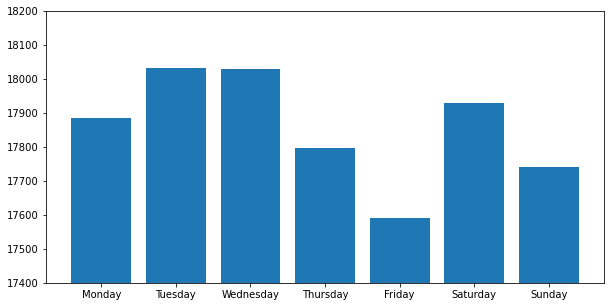

In [47]:
plt.figure(figsize=(10, 5))
plt.bar(txn_for_barplot.index, txn_for_barplot['customer_id'])
plt.ylim(17400, 18200)
plt.show()

### 1.6.3 Following the same logic as in section 1.2, generate the features that capture the count of transactions per client, year and day of the week.

In [48]:
clnt_tran_per_week = txn.groupby(by = ['customer_id', 'day_name', 'YEAR']).agg(
    cnt = pd.NamedAgg('tran_amount', 'count'))

In [49]:
annual_day_of_week_counts_pivot = pd.pivot_table(clnt_tran_per_week,
                                                index = 'customer_id',
                                                columns = ['YEAR', 'day_name'],
                                                fill_value = 0)
annual_day_of_week_counts_pivot

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996           0      1        0      0        0       1         0      0   
CS8997           0      0        0      0        1       0         1      1   
CS8998           0      0        0      0        0       1         1      2   
CS8999           0      1        1      0        0       1         0      1   
CS9000           0      0        0      2        0       0         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996           0        3  ...        1       1         2      0      0   
CS8997           2        0  ...        0       0         0      0      0   
CS8998           0        0  ...        0       1         1      0      0   
CS8999           0        2  ...        0       0         2      0      0   
CS9000           0        1  ...        1       1         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  
...              ...    ...      ...     ...       ...  
CS8996             0      0        0       0         0  
CS8997             0      0        0       0         0  
CS8998             0      0        0       0         0  
CS8999             0      0        0       0         0  
CS9000             1      0        0       0         0  

[6889 rows x 35 columns]

In [50]:
level_0 = annual_day_of_week_counts_pivot.columns.get_level_values(0).astype(str)
level_1 = annual_day_of_week_counts_pivot.columns.get_level_values(1).astype(str)
level_2 = annual_day_of_week_counts_pivot.columns.get_level_values(2).astype(str)
annual_day_of_week_counts_pivot.columns = level_0 + '_' + level_1 + '_' + level_2
annual_day_of_week_counts_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,...,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,...,0,1,1,0,0,0,0,0,0,0


### 1.6.4 Confirm that the output has the same number of rows as the final output in section 1.2 and save it as annual_day_of_week_counts_pivot.xlsx.

In [51]:
clnt_annual_aggregations_pivot.shape[0] == annual_day_of_week_counts_pivot.shape[0]

True

In [52]:
annual_day_of_week_counts_pivot.shape[1]

35

#### Two dataframes have the same number of rows, as confirmed above. 35 features/columns are created in this section.

In [53]:
annual_day_of_week_counts_pivot.to_excel("annual_day_of_week_counts_pivot.xlsx")  

### 1.6.5 Similarly, generate the features that capture the count of transactions per client, month-end-date and day of the week.

In [54]:
month_end_date = txn.groupby(by = ['customer_id', 'ME_DT', 'day_name']).agg(
    cnt = pd.NamedAgg('tran_amount', 'count'))

In [55]:
month_end_date_pd = pd.pivot_table(month_end_date,
                                 index = ['customer_id', 'ME_DT'],
                                 columns = 'day_name',
                                 fill_value = 0)

In [56]:
level_0 = month_end_date_pd.columns.get_level_values(0).astype(str)
level_1 = month_end_date_pd.columns.get_level_values(1).astype(str)
month_end_date_pd.columns = level_0 + '_' + level_1
month_end_date_pd

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   
...                            ...         ...           ...         ...   
CS9000      2014-01-31           0           0             0           1   
            2014-05-31           0           0             0           0   
            2014-07-31           0           0             0           0   
            2014-08-31           0           0             0           1   
            2015-02-28           0           0             1           0   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0  
...                              ...          ...            ...  
CS9000      2014-01-31             0            0              0  
            2014-05-31             1            0              0  
            2014-07-31             0            1              0  
            2014-08-31             0            0              0  
            2015-02-28             0            0              0  

[103234 rows x 7 columns]

### 1.6.6 Join with base table pd as you did in section 1.5 and impute with your choice of value for NaN. Save the final output as mth_day_counts.xlxs.

In [57]:
month_end_date_pd.index.names = ['CLNT_NO', 'ME_DT']

In [58]:
mth_day_counts = base_table_pd.merge(month_end_date_pd, how = 'left', on = ['CLNT_NO', 'ME_DT'])
mth_day_counts = mth_day_counts.fillna(0)
mth_day_counts

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS5295,2013-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CS5295,2015-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CS5295,2011-11-30,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,CS5295,2013-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
323778,CS8077,2011-08-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0
323779,CS8077,2012-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323780,CS8077,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323781,CS8077,2014-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### I will impute all NaN values with 0, becuase transactions did not happen in that month, not on Monday, not on Friday and so on, so transactions happened 0 times. But the month exists because we want to show the whole 47 months within this dataset.

In [60]:
mth_day_counts.to_excel('mth_day_counts.xlsx')

## 1.7 Date-related features: days since last transaction.
## In this date-related features set, we capture the frequency of the transactions in terms of the days since the last transaction. This set of features applies only to the monthly features.

### 1.7.1 The starting point is again the txn table. Recall that most clients have a single purchase per month, but some clients have multiple purchases in a month. Since we want to calculate the "days since last transaction", we want to capture the last transaction in a month for every client. Use the appropriate groupby to create the table last monthly purchase that captures the last 'txn date' (aggfunc=max) for every client and month.

In [35]:
last_monthly_purchase = txn.groupby(['customer_id', 'ME_DT']).agg(
    last_month_purchase = pd.NamedAgg(column = 'txn_date', aggfunc = "max")
)
last_monthly_purchase.head(20)

last_month_purchase
customer_id ME_DT                         
CS1112      2011-06-30          2011-06-15
            2011-08-31          2011-08-19
            2011-10-31          2011-10-02
            2012-04-30          2012-04-08
            2012-06-30          2012-06-24
            2012-07-31          2012-07-03
            2012-09-30          2012-09-16
            2012-12-31          2012-12-15
            2013-03-31          2013-03-01
            2013-07-31          2013-07-01
            2013-11-30          2013-11-13
            2014-04-30          2014-04-29
            2014-07-31          2014-07-16
            2014-12-31          2014-12-04
            2015-01-31          2015-01-14
CS1113      2011-05-31          2011-05-27
            2011-07-31          2011-07-25
            2011-10-31          2011-10-23
            2012-03-31          2012-03-30
            2012-09-30          2012-09-05

In [62]:
last_monthly_purchase.reset_index(level = ['ME_DT', 'customer_id'], inplace = True)
last_monthly_purchase.columns = ['CLNT_NO', 'ME_DT', 'last_month_purchase']
last_monthly_purchase

,CLNT_NO,ME_DT,last_month_purchase
0,CS1112,2011-06-30,2011-06-15
1,CS1112,2011-08-31,2011-08-19
2,CS1112,2011-10-31,2011-10-02
3,CS1112,2012-04-30,2012-04-08
4,CS1112,2012-06-30,2012-06-24
...,...,...,...
103229,CS9000,2014-01-31,2014-01-12
103230,CS9000,2014-05-31,2014-05-08
103231,CS9000,2014-07-31,2014-07-08
103232,CS9000,2014-08-31,2014-08-24


### 1.7.2 Join base table pd with last monthly purchase as we did in section 1.5.

In [63]:
last_monthly_purchase_base = base_table_pd.merge(last_monthly_purchase, how = 'left', on = ['CLNT_NO', 'ME_DT'])
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_month_purchase
0,CS5295,2013-02-28,2013-02-11
1,CS5295,2015-03-31,NaT
2,CS5295,2011-11-30,2011-11-16
3,CS5295,2013-11-30,NaT
4,CS5295,2014-03-31,NaT
...,...,...,...
323778,CS8077,2011-08-31,2011-08-28
323779,CS8077,2012-09-30,NaT
323780,CS8077,2014-09-30,NaT
323781,CS8077,2014-02-28,NaT


In [64]:
# check snapshot
last_monthly_purchase_base[last_monthly_purchase_base['CLNT_NO'] == 'CS1112'].sort_values('ME_DT')[:8]

,CLNT_NO,ME_DT,last_month_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT
157048,CS1112,2011-10-31,2011-10-02
157029,CS1112,2011-11-30,NaT
157049,CS1112,2011-12-31,NaT


#### For one client, it is meaningless for us to fill the NaT values until we reach the first non-NaT value (given the date is ascendingly sorted); and we will impute any NaT values that has a 'last_month_purchase' value(date) before them using the previous value(date).

#### The reason is we don't impute NaT values until we reach the first non-NaT value(date) is that this person did not make any purchases before that date; and the reason we impute other NaT values after a valid last_month_purchase value appeared using previous value is because this person has made a purchase in the last month (or before), even though this person did not make any purchases this month, so we record this NaT value with the last non NaT value (the last purchase date).

### 1.7.3 To answer the imputation problem, we have to think what value should we use for say July 2011 for 'last monthly purchase'? The answer is that in July the value for the last monthly purchase is the previous line value: 2011-06-15. In other words, for every client we want to forward-fill the NaT values.

In [65]:
last_monthly_purchase_base = last_monthly_purchase_base.sort_values([
    'CLNT_NO', 'ME_DT']).groupby('CLNT_NO').apply(lambda x: x.ffill())

In [66]:
## check snapshot
last_monthly_purchase_base[92:97]

,CLNT_NO,ME_DT,last_month_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14


### 1.7.4 Subtract the two date columns and convert the output to .dt.days to calculate the column 'days since_last_txn'.

In [67]:
last_monthly_purchase_base['days_since_last_txn'] = last_monthly_purchase_base['ME_DT'] - last_monthly_purchase_base['last_month_purchase']

In [68]:
last_monthly_purchase_base['days_since_last_txn'] = last_monthly_purchase_base['days_since_last_txn'].dt.days

In [69]:
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_month_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24,98.0
295126,CS9000,2014-12-31,2014-08-24,129.0
295119,CS9000,2015-01-31,2014-08-24,160.0
295136,CS9000,2015-02-28,2015-02-28,0.0


### 1.7.5 Plot a histogram of the 'days since last txn'. Save the columns ['CLNT_NO', 'ME_DT', 'days_since_last_txn'] as days_since_last_txn.xlsx.

(array([1.48512e+05, 7.44520e+04, 3.87880e+04, 2.05560e+04, 1.09710e+04,
        5.80200e+03, 3.15700e+03, 1.75700e+03, 9.59000e+02, 5.10000e+02,
        3.05000e+02, 1.94000e+02, 1.06000e+02, 7.40000e+01, 3.90000e+01,
        2.90000e+01, 1.50000e+01, 1.50000e+01, 7.00000e+00, 4.00000e+00]),
 array([  0.  ,  48.05,  96.1 , 144.15, 192.2 , 240.25, 288.3 , 336.35,
        384.4 , 432.45, 480.5 , 528.55, 576.6 , 624.65, 672.7 , 720.75,
        768.8 , 816.85, 864.9 , 912.95, 961.  ]),
 <BarContainer object of 20 artists>)

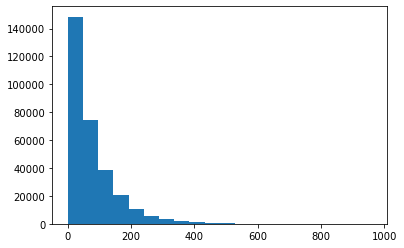

In [70]:
plt.hist(last_monthly_purchase_base['days_since_last_txn'], bins = 20)

#### I will impute the remaining NaT value with 0, since the person did not make any purchases yet. If we fill it with other positive values, we are saying it has been days since this person made last purchases, whereas this person did not make initial purchases.

In [71]:
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel('days_since_last_txn.xlsx')